# Lending Club Case Study

## Approach
The following sequence of steps will be performed in this case study.
1. Data Exploration
2. Data Cleaning (Handling Nulls, Removing unwanted columns, Converting to right datatypes etc.)
3. Data Enriching (Derived Metrics etc.)
4. Data Analysis (Univariated, BiVariate Analysis etc.)

In [475]:
# Importing the required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [476]:
# Load the dataset
df = pd.read_csv('loan.csv')

### Data Exploration

In [477]:
# Check the shape of dataset
df.shape

(39717, 111)

In [478]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [479]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


### Data Cleaning

#### Handling Nulls

In [480]:
# Look for columns with all null values
df.isna().all().size

111

In [481]:
df.columns[df.isna().all()]

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [482]:
# Drop the columns with all null values
df.dropna(axis=1, how='all', inplace=True)
df.shape

(39717, 57)

In [483]:
# Look for rows with all null values
df[df.isna().all(axis=1)]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


In [484]:
df.shape

(39717, 57)

In [485]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [486]:
# Find columns with high percentage of missing values
round(100*df.isna().sum()/df.index.size,2).sort_values(ascending=False)

next_pymnt_d                  97.13
mths_since_last_record        92.99
mths_since_last_delinq        64.66
desc                          32.59
emp_title                      6.19
emp_length                     2.71
pub_rec_bankruptcies           1.75
last_pymnt_d                   0.18
chargeoff_within_12_mths       0.14
collections_12_mths_ex_med     0.14
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
home_ownership                 0.00
int_rate                       0.00
out_prncp_inv                  0.00
total_pymnt                    0.00
total_pymnt_inv                0.00
total_rec_prncp                0.00
total_rec_int                  0.00
total_rec_late_fee             0.00
recoveries                     0.00
collection_recovery_fee        0.00
term                           0.00
last_pymnt_amnt                0.00
initial_list_status            0.00
funded_amnt_inv             

In [487]:
# Drop the columns with very high percentage of missing values
df.drop(['next_pymnt_d','mths_since_last_record','mths_since_last_delinq','desc'], axis=1, inplace=True)

In [488]:
df.shape

(39717, 53)

#### Handle unrelevant data

In [489]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [490]:
# Drop more columns that seem not relevant for any analysis
df.drop(['id','member_id','emp_title','url','title'], axis=1, inplace=True)
# Drop zip_code column since it is masked
df.drop(['zip_code'], axis=1, inplace=True)
# Drop columns that contain data after the loan is approved. These wont be available during loan approval decision making.
df.drop(['out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 
        'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt'], axis=1, inplace=True)

In [491]:
df.shape

(39717, 36)

In [492]:
df.nunique()

loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
purpose                          14
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                         40
pub_rec                           5
revol_bal                     21711
revol_util                     1089
total_acc                        82
initial_list_status               1
last_credit_pull_d          

In [493]:
# Drop columns with only single value
singleval_cols = df.columns[df.nunique() == 1]
df.drop(columns=singleval_cols, inplace=True)
df.shape

(39717, 27)

In [494]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  addr_state         

In [495]:
round(100*df.isna().sum()/df.index.size,2).sort_values(ascending=False).head(10)

emp_length              2.71
pub_rec_bankruptcies    1.75
revol_util              0.13
last_credit_pull_d      0.01
purpose                 0.00
total_acc               0.00
revol_bal               0.00
pub_rec                 0.00
open_acc                0.00
inq_last_6mths          0.00
dtype: float64

In [496]:
df.shape

(39717, 27)

#### Data Imputation and Conversion to right data types

In [497]:
# Drop data where imputation might not be right approach or not needed
df = df[~df['pub_rec_bankruptcies'].isna()]
df = df[~df['revol_util'].isna()]
df = df[~df['last_credit_pull_d'].isna()]
df.shape

(38969, 27)

In [498]:
round(100*df.isna().sum()/df.index.size,2).sort_values(ascending=False).head()

emp_length            2.75
loan_amnt             0.00
purpose               0.00
last_credit_pull_d    0.00
total_acc             0.00
dtype: float64

In [499]:
# Correct the data type for revol_util column to float
df['revol_util'].describe()

count     38969
unique     1089
top          0%
freq        942
Name: revol_util, dtype: object

In [500]:
df['revol_util'] = pd.to_numeric(df['revol_util'].apply(lambda x : x.split('%')[0]))
df['revol_util'].head()

0    83.7
1     9.4
2    98.5
3    21.0
4    53.9
Name: revol_util, dtype: float64

In [501]:
df['revol_util'].describe()

count    38969.000000
mean        48.954600
std         28.305815
min          0.000000
25%         25.500000
50%         49.500000
75%         72.500000
max         99.900000
Name: revol_util, dtype: float64

In [502]:
# Handle the emp_length column data
df['emp_length'].info()

<class 'pandas.core.series.Series'>
Index: 38969 entries, 0 to 39680
Series name: emp_length
Non-Null Count  Dtype 
--------------  ----- 
37897 non-null  object
dtypes: object(1)
memory usage: 608.9+ KB


In [503]:
df['emp_length'].value_counts()

emp_length
10+ years    8759
< 1 year     4404
2 years      4299
3 years      4030
4 years      3384
5 years      3244
1 year       3142
6 years      2194
7 years      1748
8 years      1452
9 years      1241
Name: count, dtype: int64

In [504]:
df['emp_length'].mode()

0    10+ years
Name: emp_length, dtype: object

In [505]:
# Imputing the missing values with mode. 
df['emp_length'] = df['emp_length'].fillna(df['emp_length'].mode()[0])

In [506]:
df['emp_length'].info()

<class 'pandas.core.series.Series'>
Index: 38969 entries, 0 to 39680
Series name: emp_length
Non-Null Count  Dtype 
--------------  ----- 
38969 non-null  object
dtypes: object(1)
memory usage: 608.9+ KB


In [507]:
df.select_dtypes(['object']).columns

Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'earliest_cr_line', 'last_credit_pull_d'],
      dtype='object')

In [508]:
# Fix int_rate column
df['int_rate'].info()

<class 'pandas.core.series.Series'>
Index: 38969 entries, 0 to 39680
Series name: int_rate
Non-Null Count  Dtype 
--------------  ----- 
38969 non-null  object
dtypes: object(1)
memory usage: 608.9+ KB


In [509]:
df['int_rate'].head()

0    10.65%
1    15.27%
2    15.96%
3    13.49%
4    12.69%
Name: int_rate, dtype: object

In [510]:
df['int_rate'] = pd.to_numeric(df['int_rate'].apply(lambda x : x.split('%')[0]))
df['int_rate'].head()

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float64

In [511]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38969 entries, 0 to 39680
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38969 non-null  int64  
 1   funded_amnt           38969 non-null  int64  
 2   funded_amnt_inv       38969 non-null  float64
 3   term                  38969 non-null  object 
 4   int_rate              38969 non-null  float64
 5   installment           38969 non-null  float64
 6   grade                 38969 non-null  object 
 7   sub_grade             38969 non-null  object 
 8   emp_length            38969 non-null  object 
 9   home_ownership        38969 non-null  object 
 10  annual_inc            38969 non-null  float64
 11  verification_status   38969 non-null  object 
 12  issue_d               38969 non-null  object 
 13  loan_status           38969 non-null  object 
 14  purpose               38969 non-null  object 
 15  addr_state            38

#### Handle Outliers

In [512]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
count,38969.000000,38969.000000,38969.000000,38969.000000,38969.000000,3.896900e+04,38969.000000,38969.000000,38969.000000,38969.000000,38969.000000,38969.000000,38969.000000,38969.000000,38969.000000
mean,11250.561344,10975.878262,10550.008975,12.041227,324.819092,6.898908e+04,13.363304,0.145603,0.866689,9.298622,0.055531,13393.585773,48.954600,22.154918,0.043291
std,7472.956184,7200.649637,7104.055097,3.742123,208.869502,6.315136e+04,6.668488,0.490252,1.067431,4.380961,0.238136,15841.317479,28.305815,11.392707,0.204394
min,500.000000,500.000000,0.000000,5.420000,16.080000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,5500.000000,5425.000000,5000.000000,9.250000,167.340000,4.080000e+04,8.230000,0.000000,0.000000,6.000000,0.000000,3737.000000,25.500000,14.000000,0.000000
50%,10000.000000,9725.000000,9000.000000,11.860000,280.470000,5.910000e+04,13.450000,0.000000,1.000000,9.000000,0.000000,8877.000000,49.500000,20.000000,0.000000
75%,15000.000000,15000.000000,14497.884390,14.610000,430.780000,8.250000e+04,18.630000,0.000000,1.000000,12.000000,0.000000,17074.000000,72.500000,29.000000,0.000000
max,35000.000000,35000.000000,35000.000000,24.590000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,99.900000,90.000000,2.000000


In [513]:
# Analyze annual_inc column for Outliers and fix it

Text(0.5, 1.0, 'Annual Income Variation')

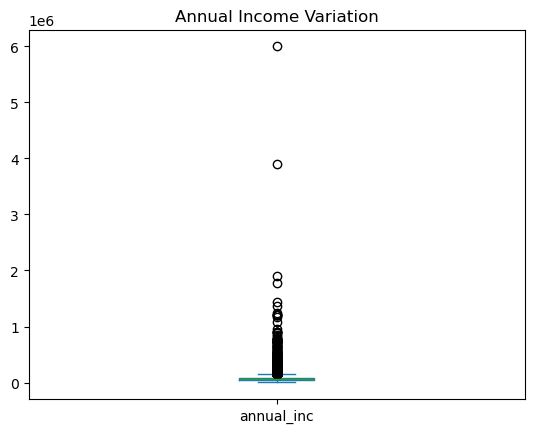

In [514]:
df['annual_inc'].plot(kind='box')
plt.title('Annual Income Variation')

In [515]:
df['annual_inc'].quantile([0.5,0.75,0.9,0.95,0.98,0.99])

0.50     59100.00
0.75     82500.00
0.90    116000.00
0.95    141837.60
0.98    186295.68
0.99    234192.00
Name: annual_inc, dtype: float64

In [516]:
# Drop outlier values crossing the 99th percentile 
annual_inc_99perc = df['annual_inc'].quantile(0.99)
df = df[df['annual_inc']<=annual_inc_99perc]

Text(0.5, 1.0, 'Annual Income Variation')

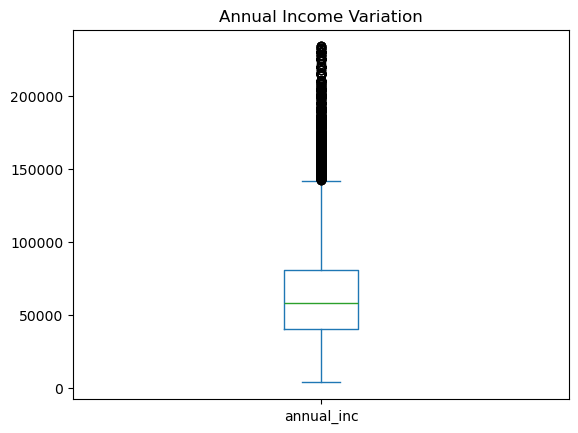

In [517]:
df['annual_inc'].plot(kind='box')
plt.title('Annual Income Variation')

In [518]:
# From the loan_status, ignore loans with 'Current' status, as we wouldnt know if they will finish or default
df = df[~(df['loan_status'] == 'Current')]
df.shape

(37453, 27)

#### Create Derived Metrics

In [519]:
# Analyze loan status to determine default status
df['loan_status'].value_counts()

loan_status
Fully Paid     32002
Charged Off     5451
Name: count, dtype: int64

In [520]:
df['default_status'] = df['loan_status'].apply(lambda x: 'Default' if x == 'Charged Off' else 'Not Default')
df['default_status'].head()

0    Not Default
1        Default
2    Not Default
3    Not Default
5    Not Default
Name: default_status, dtype: object

In [521]:
# Verify loan issue date and derive year and month
df['issue_d'].info()

<class 'pandas.core.series.Series'>
Index: 37453 entries, 0 to 39680
Series name: issue_d
Non-Null Count  Dtype 
--------------  ----- 
37453 non-null  object
dtypes: object(1)
memory usage: 585.2+ KB


In [522]:
df['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [523]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['issue_d'].info()

<class 'pandas.core.series.Series'>
Index: 37453 entries, 0 to 39680
Series name: issue_d
Non-Null Count  Dtype         
--------------  -----         
37453 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 585.2 KB


In [524]:
df['issue_year'] = df['issue_d'].apply(lambda x: x.year)
df['issue_year'].head()

0    2011
1    2011
2    2011
3    2011
5    2011
Name: issue_year, dtype: int64

In [525]:
df['issue_month'] = df['issue_d'].apply(lambda x: x.month)
df['issue_month'].head()

0    12
1    12
2    12
3    12
5    12
Name: issue_month, dtype: int64

In [526]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,pub_rec_bankruptcies,default_status,issue_year,issue_month
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,3,0,13648,83.7,9,May-16,0.0,Not Default,2011,12
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,3,0,1687,9.4,4,Sep-13,0.0,Default,2011,12
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,2,0,2956,98.5,10,May-16,0.0,Not Default,2011,12
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,10,0,5598,21.0,37,Apr-16,0.0,Not Default,2011,12
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,...,9,0,7963,28.3,12,Jan-16,0.0,Not Default,2011,12


## Data Analysis

#### Analysis of the attributes and variables associated with the loans

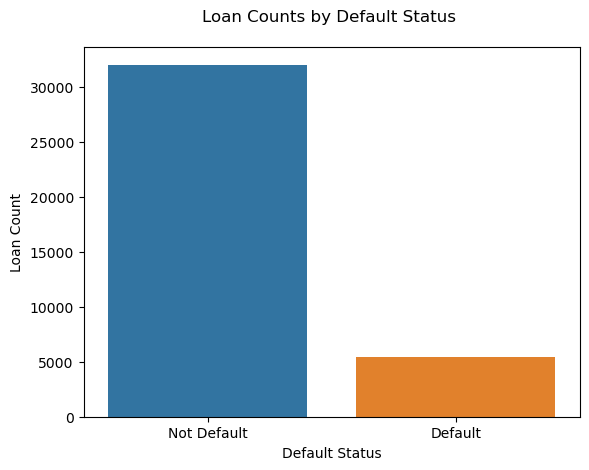

In [580]:
# Default Status
sns.countplot(data=df, x='default_status')
plt.title('Loan Counts by Default Status \n')
plt.xlabel('Default Status')
plt.ylabel('Loan Count')
plt.show()

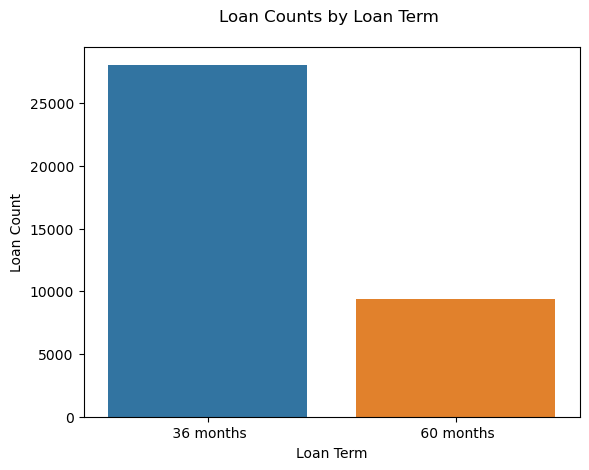

In [581]:
# Loan Term Analysis
sns.countplot(data=df, x='term')
plt.title('Loan Counts by Loan Term \n')
plt.xlabel('Loan Term')
plt.ylabel('Loan Count')
plt.show()

Observation - Large number of loans are for lower term of 36 months

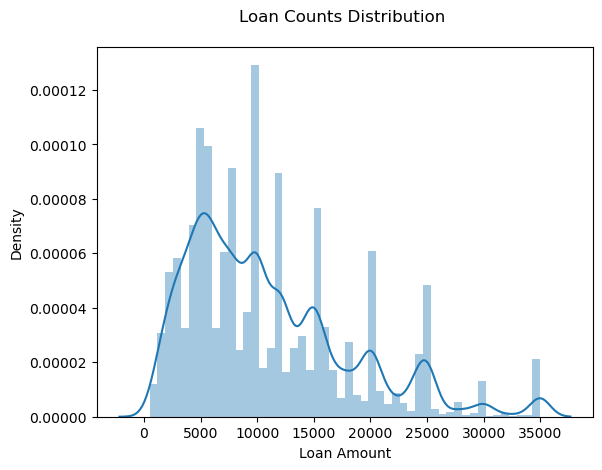

In [582]:
# Loan Amount
sns.distplot(df['loan_amnt'])
plt.title('Loan Counts Distribution \n')
plt.xlabel('Loan Amount')
plt.show()

Observation - Distribution of loans decrease as the loan amount increases.

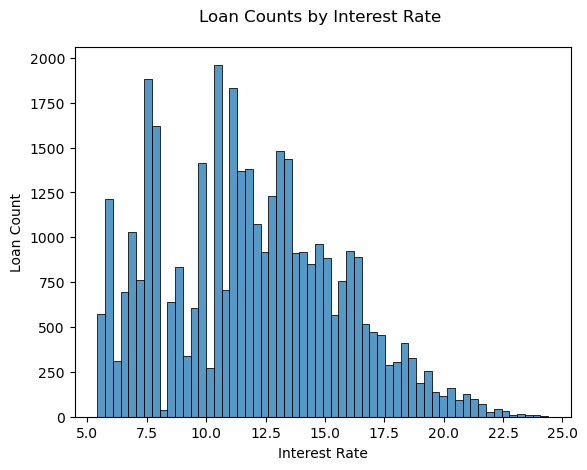

In [583]:
# Interest Rate
sns.histplot(data=df, x='int_rate')
plt.title('Loan Counts by Interest Rate \n')
plt.xlabel('Interest Rate')
plt.ylabel('Loan Count')
plt.show()

Observation - As interest rate increases, the loan counts decrease.

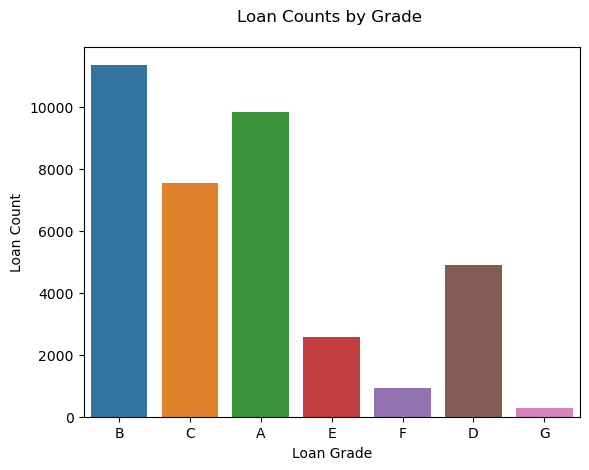

In [584]:
# Grade
sns.countplot(data=df, x='grade')
plt.title('Loan Counts by Grade \n')
plt.xlabel('Loan Grade')
plt.ylabel('Loan Count')
plt.show()

Observation - Higher grades have more loan counts associated to them. As grade decreases, the chances of loan being approved decreases.

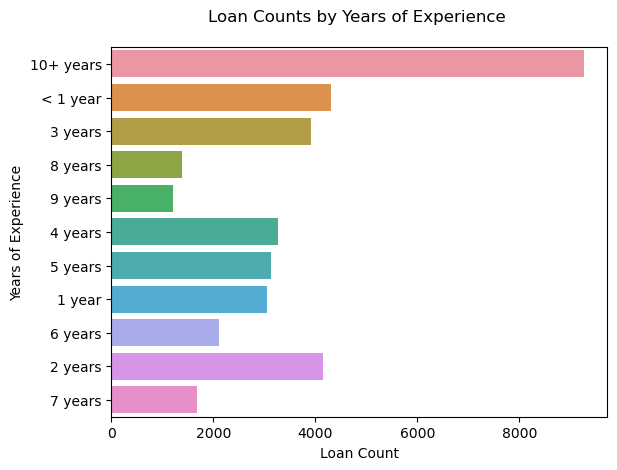

In [585]:
# Years of Experience
sns.countplot(data=df, y='emp_length')
plt.title('Loan Counts by Years of Experience \n')
plt.xlabel('Loan Count')
plt.ylabel('Years of Experience')
plt.show()

Observation - Applicants with 10+ years of experience have taken more loans.

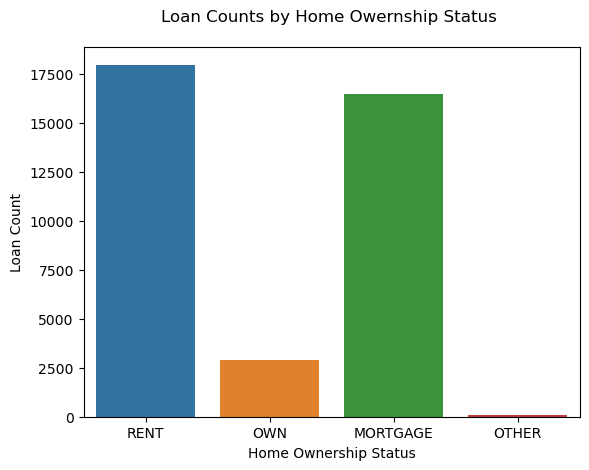

In [586]:
# Home Owernship
sns.countplot(data=df, x='home_ownership')
plt.title('Loan Counts by Home Owernship Status \n')
plt.xlabel('Home Ownership Status')
plt.ylabel('Loan Count')
plt.show()

Observation - Most loans are taken by applicants staying in Rented home or homes under Mortgage.

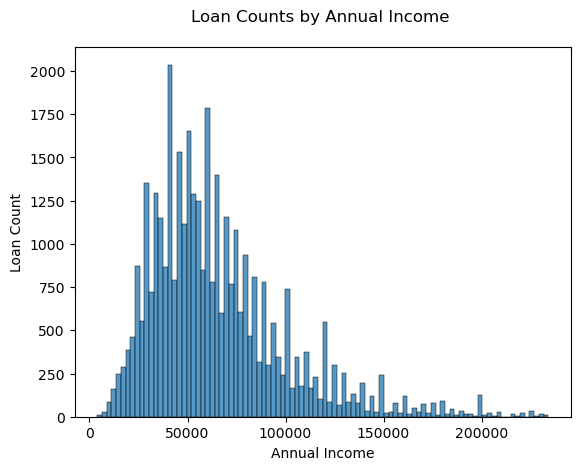

In [588]:
# Annual Income
sns.histplot(data=df, x='annual_inc')
plt.title('Loan Counts by Annual Income \n')
plt.xlabel('Annual Income')
plt.ylabel('Loan Count')
plt.show()

Observation - More loans are for the middle income group. At lower and very high annual income levels, the number of loans are less.

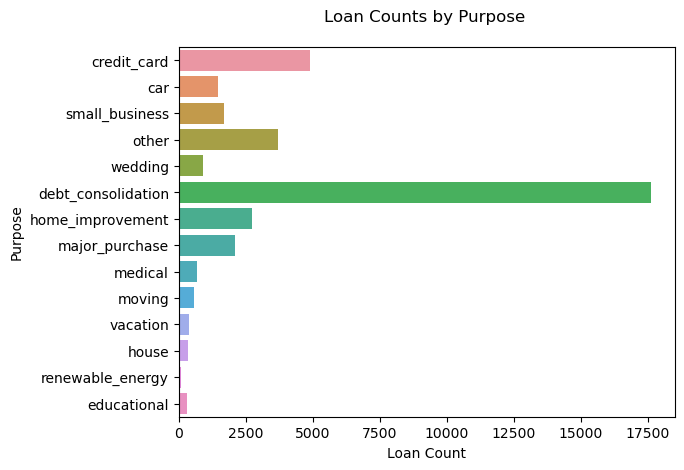

In [589]:
# Purpose
sns.countplot(data=df, y='purpose')
plt.title('Loan Counts by Purpose \n')
plt.xlabel('Loan Count')
plt.ylabel('Purpose')
plt.show()

Observation - Most of the loans were for Debt consolidation purpose.

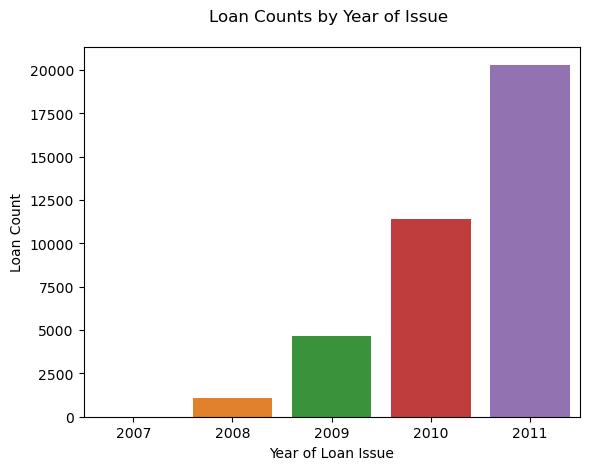

In [591]:
# Year of Loan Issue
sns.countplot(data=df, x='issue_year')
plt.title('Loan Counts by Year of Issue \n')
plt.xlabel('Year of Loan Issue')
plt.ylabel('Loan Count')
plt.show()

Observation - Number of loans taken keep increasing(almost doubling) every year.

#### Analysis of the impact of various attribute on Loan Default